In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing datsets

In [43]:
sheets=pd.ExcelFile("/content/Data Analyst Intern Assignment - Excel.xlsx")

In [44]:
sheets.sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [45]:
user_details = pd.read_excel(sheets, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(sheets, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(sheets, sheet_name="OrderDetails.csv")

In [46]:
print(user_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [47]:
print(cooking_sessions.head())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [48]:
print(order_details.head())

   Order ID User ID Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001 2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  


### Data Cleaning

Handling missing values by imputation or dropping, based on relevance. (No probable missing values in data)

Standardizing date-time formats if necessary and ensure proper parsing.

In [49]:
# Ensure correct data types
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

### Data Merging

In [50]:
# Merge user details with cooking sessions
user_cooking = pd.merge(user_details, cooking_sessions, on="User ID", how="left")

In [51]:
# Merge the result with order details
merged_data = pd.merge(user_cooking, order_details, on=["User ID"], how="left")

In [52]:
print(merged_data.head())

  User ID      User Name  Age  Location Registration Date         Phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             Email Favorite Meal  Total Orders Session ID_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  Session Rating Order ID Order Date Meal Type_y      Dish Name_y  \
0            4.5   1001.0 2024-12-01      Dinner        Spaghetti   
1 

### Analysis

In [74]:
# Correlation between session ratings and order ratings
correlation = merged_data[['Session Rating', 'Rating']].corr()
correlation

,Session Rating,Rating
Session Rating,1.000000,0.326955
Rating,0.326955,1.000000


#### Identifying Popular Dishes

In [64]:
popular_dishes = merged_data.groupby('Dish Name_y').size().sort_values(ascending=False).head(10)
popular_dishes

,0
Dish Name_y,
Grilled Chicken,9
Spaghetti,9
Caesar Salad,7
Pancakes,6
Veggie Burger,4
Oatmeal,3


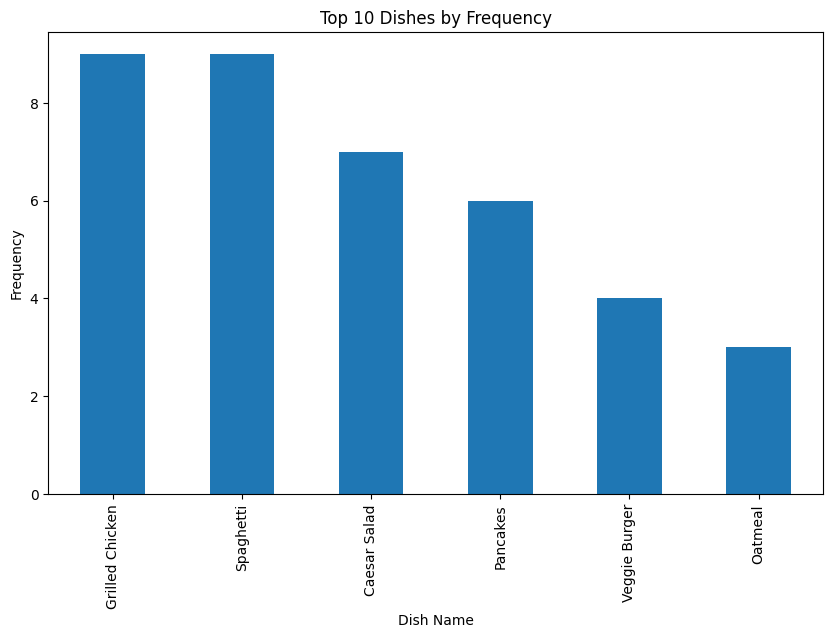

In [54]:
popular_dishes.plot(kind='bar', figsize=(10, 6), title='Top 10 Dishes by Frequency')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Popular dishes by demographics
demographic_dishes = merged_data.groupby(['Age', 'Dish Name_y']).size().unstack().fillna(0)

In [63]:
demographic_dishes

Dish Name_y,Caesar Salad,Grilled Chicken,Oatmeal,Pancakes,Spaghetti,Veggie Burger
Age,,,,,,
25,0.0,1.0,0.0,0.0,0.0,0.0
27,2.0,0.0,0.0,0.0,2.0,0.0
28,0.0,3.0,0.0,3.0,3.0,0.0
30,2.0,2.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,1.0
35,3.0,0.0,3.0,0.0,3.0,0.0
38,0.0,0.0,0.0,0.0,1.0,0.0
42,0.0,3.0,0.0,3.0,0.0,3.0


In [66]:
# Average order amount by location
avg_order_by_location = merged_data.groupby('Location')['Amount (USD)'].mean()

In [68]:
avg_order_by_location

,Amount (USD)
Location,
Austin,13.000000
Boston,14.000000
Chicago,10.666667
Dallas,NaN
Los Angeles,10.333333
Miami,11.000000
New York,11.666667
Phoenix,NaN
San Francisco,10.750000


Order Timing Analysis

Analyzing when users are most likely to place orders.

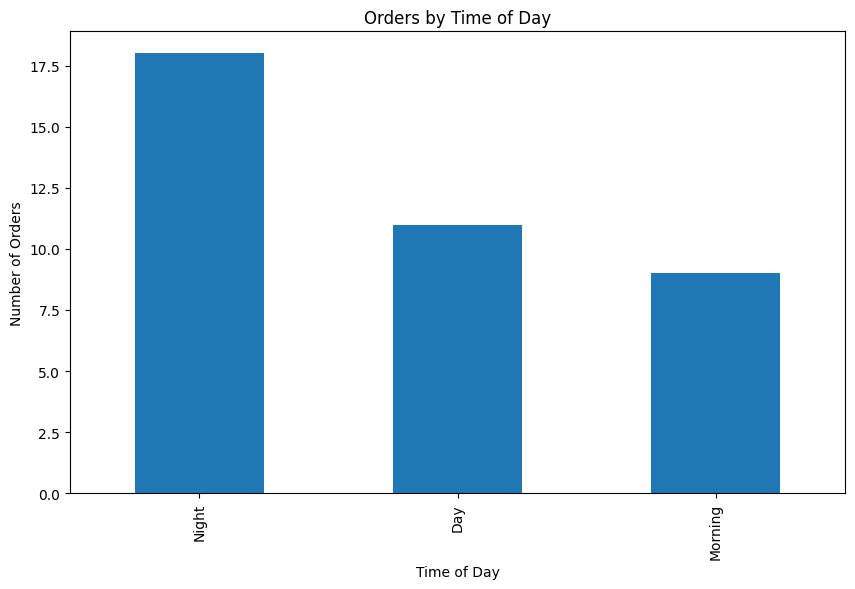

In [55]:
# Analyze orders by time of day
order_timing = merged_data.groupby('Time of Day').size().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
order_timing.plot(kind='bar', title='Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.show()

Session Duration Impact

Examine how session duration influences session ratings and order likelihood.

                Session Rating  Order ID
Duration Range                          
0-30                  4.338462        26
31-60                 4.791667        12
61-90                      NaN         0
91-120                     NaN         0
>120                       NaN         0


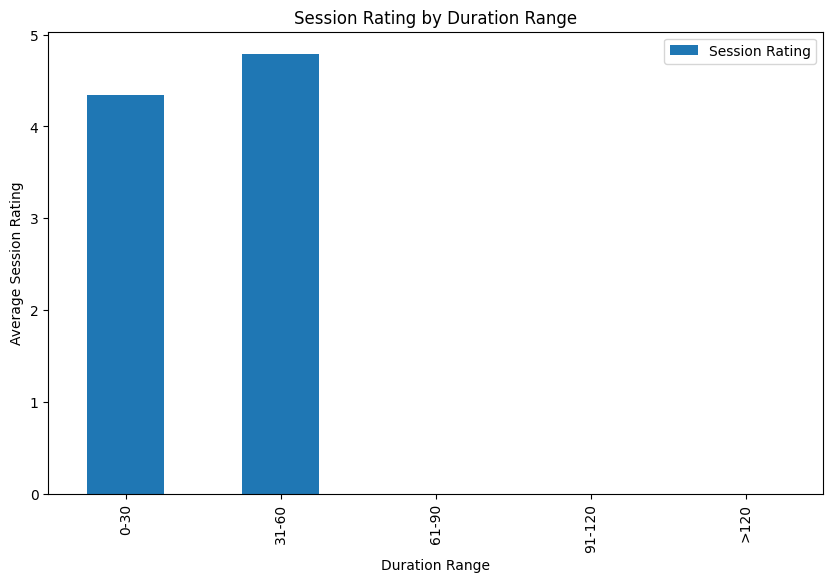

In [56]:
# Average rating and order likelihood by session duration range
merged_data['Duration Range'] = pd.cut(merged_data['Duration (mins)'], bins=[0, 30, 60, 90, 120, 300], labels=['0-30', '31-60', '61-90', '91-120', '>120'])
duration_analysis = merged_data.groupby('Duration Range').agg({'Session Rating': 'mean', 'Order ID': 'count'})
print(duration_analysis)

# Visualization
duration_analysis[['Session Rating']].plot(kind='bar', title='Session Rating by Duration Range', figsize=(10, 6))
plt.ylabel('Average Session Rating')
plt.show()

Order Status Analysis

Investigate the frequency of different order statuses.

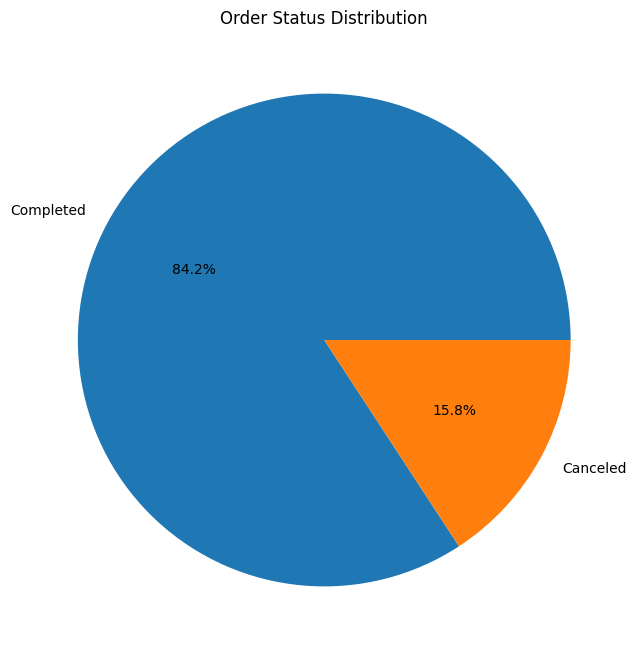

In [57]:
# Order status distribution
order_status = merged_data['Order Status'].value_counts()

# Visualization
order_status.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Order Status Distribution')
plt.ylabel('')
plt.show()

Repeat Orders

Determine the percentage of repeat orders by users.

Repeat Order Rates:
 Order ID
3    0.3
1    0.3
2    0.2
0    0.2
Name: proportion, dtype: float64


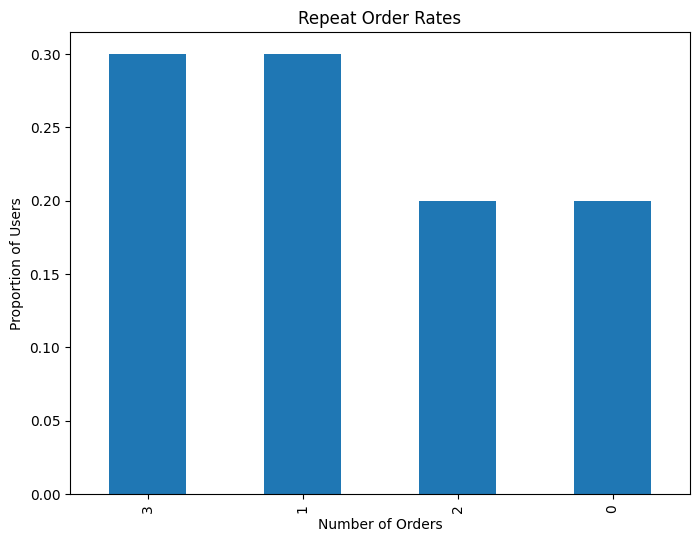

In [58]:
# Repeat orders
repeat_orders = merged_data.groupby('User ID')['Order ID'].nunique().value_counts(normalize=True)
print("Repeat Order Rates:\n", repeat_orders)

# Visualization
repeat_orders.plot(kind='bar', figsize=(8, 6), title='Repeat Order Rates')
plt.xlabel('Number of Orders')
plt.ylabel('Proportion of Users')
plt.show()

Session Popularity by Meal Type


Identify which meal types are most common during cooking sessions.

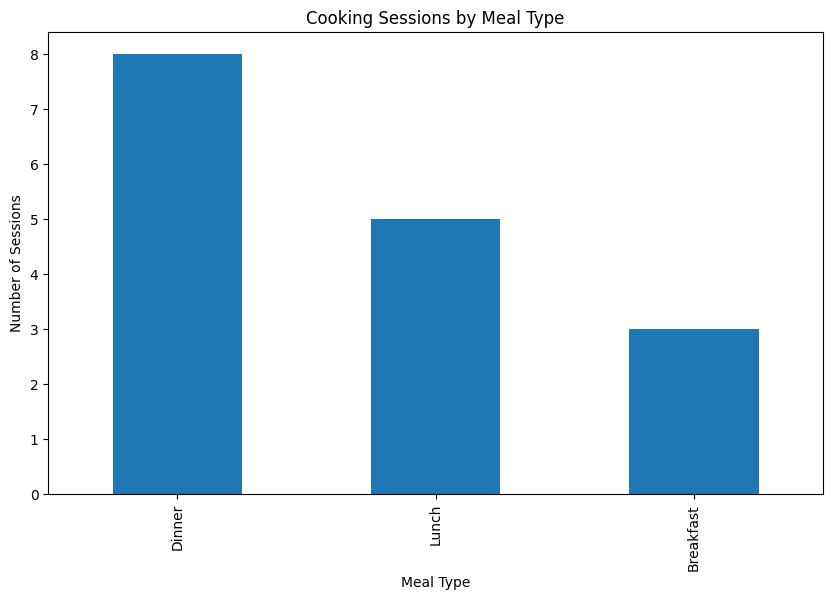

In [59]:
# Sessions by Meal Type
meal_type_sessions = cooking_sessions['Meal Type'].value_counts()

# Visualization
meal_type_sessions.plot(kind='bar', figsize=(10, 6), title='Cooking Sessions by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Number of Sessions')
plt.show()

Session Ratings by Dish Name

Explore which dishes consistently receive high session ratings.

Dish Name_y
Grilled Chicken    4.577778
Pancakes           4.566667
Veggie Burger      4.525000
Spaghetti          4.488889
Caesar Salad       4.400000
Oatmeal            4.133333
Name: Session Rating, dtype: float64


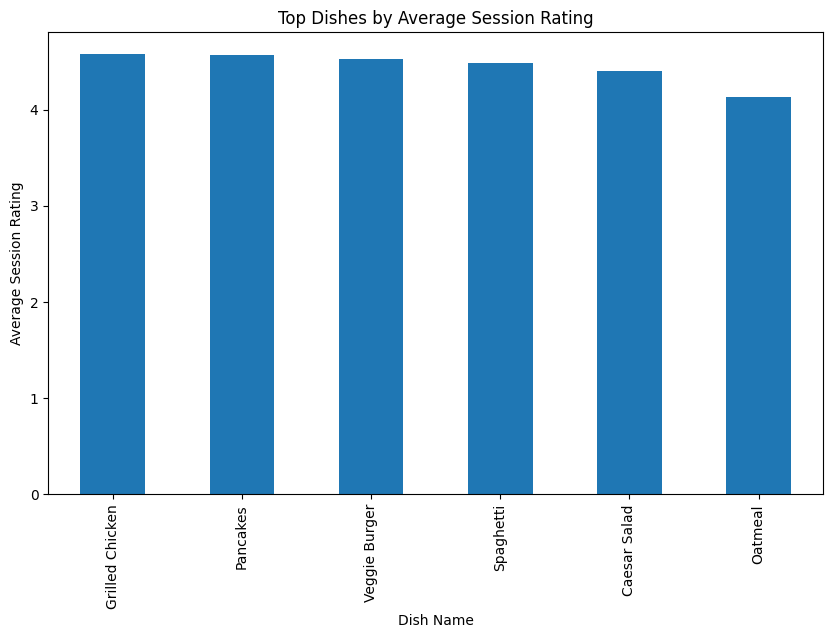

In [75]:
# Average session rating by dish
dish_ratings = merged_data.groupby('Dish Name_y')['Session Rating'].mean().sort_values(ascending=False).head(10)
print(dish_ratings)

# Visualization
dish_ratings.plot(kind='bar', figsize=(10, 6), title='Top Dishes by Average Session Rating')
plt.xlabel('Dish Name')
plt.ylabel('Average Session Rating')
plt.show()

### Exporting Merged and Cleaned data

In [61]:
merged_data.to_excel("cleaned_data.xlsx", index=False)